In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [7]:
barents = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/PhysicalModels/Data/nextsim_grid/lead_time_2/barents.csv", index_col=0)
barents.index = pd.to_datetime(barents.index, format = "%Y-%m-%d")
nextsim = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/PhysicalModels/Data/nextsim_grid/lead_time_2/nextsim.csv", index_col=0)
nextsim.index = pd.to_datetime(nextsim.index, format = "%Y-%m-%d")
osisaf = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/PhysicalModels/Data/nextsim_grid/lead_time_2/osisaf.csv", index_col=0)
osisaf.index = pd.to_datetime(osisaf.index, format = "%Y-%m-%d")
persistence = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/PhysicalModels/Data/nextsim_grid/lead_time_2/persistence.csv", index_col=0)
persistence.index = pd.to_datetime(persistence.index, format = "%Y-%m-%d")
ml = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/PhysicalModels/Data/nextsim_grid/lead_time_2/weights_21021550.csv", index_col=0)
ml.index = pd.to_datetime(ml.index, format = "%Y-%m-%d")

In [9]:
barents.loc['2022-01':'2022-05'] = np.nan

In [15]:
ml_barents = (100 * (barents['NIIEE_2'] - ml['NIIEE_2']) / barents['NIIEE_2'])
ml_nextsim = (100 * (nextsim['NIIEE_2'] - ml['NIIEE_2']) / nextsim['NIIEE_2'])
ml_osisaf = (100 * (osisaf['NIIEE_2'] - ml['NIIEE_2']) / osisaf['NIIEE_2'])
ml_persistence = (100 * (persistence['NIIEE_2'] - ml['NIIEE_2']) / persistence['NIIEE_2'])

In [16]:
print(f"{ml_barents.mean()=}")
print(f"{ml_nextsim.mean()=}")
print(f"{ml_osisaf.mean()=}")
print(f"{ml_persistence.mean()=}")

ml_barents.mean()=23.004567505479496
ml_nextsim.mean()=40.54220016060851
ml_osisaf.mean()=32.42825169904777
ml_persistence.mean()=16.749188006402722


In [45]:
ml_nextsim_days = nextsim['NIIEE_2'] - ml['NIIEE_2']


In [46]:
ml_persistence_days = persistence['NIIEE_2'] - ml['NIIEE_2']


In [47]:
ml_osisaf_days = osisaf['NIIEE_2'] - ml['NIIEE_2']


In [48]:
ml_barents_days = barents['NIIEE_2'] - ml['NIIEE_2']


In [49]:
((ml_nextsim_days > 0).sum() + (ml_persistence_days > 0).sum() + (ml_osisaf_days > 0).sum() + (ml_barents_days > 0).sum()) / (ml_nextsim_days.dropna().size + ml_persistence_days.dropna().size + ml_osisaf_days.dropna().size + ml_barents_days.dropna().size)

0.8986615678776291

In [39]:
ml_nextsim_days.dropna().size

142

In [2]:
def plot_area(df, num_classes=7):
    for i in range(num_classes):
        ax = df[f'target_area{i}'].plot(label='target')
        df[f'forecast_area{i}'].plot(ax=ax, label='forecast')
        ax.set_title(f'SIC area for concenration class {i}')
        plt.legend()
        plt.show()

In [3]:
model = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/PhysicalModels/Data/amsr2_grid/lead_time_2/weights_07021610.csv", index_col=0)
model.index = pd.to_datetime(model.index, format="%Y-%m-%d")

In [4]:
model

,IIEE_1,IIEE_2,IIEE_3,IIEE_4,forecast_area0,forecast_area1,forecast_area2,forecast_area3,forecast_area4,target_area0,target_area1,target_area2,target_area3,target_area4
date,,,,,,,,,,,,,,
2022-01-03,105664.0625,100546.8750,101210.9375,90000.0000,1.244023e+06,76093.7500,70664.0625,113984.3750,1.204648e+06,1.333281e+06,61835.9375,68671.8750,71367.1875,1.174258e+06
2022-01-04,111562.5000,98320.3125,96445.3125,103710.9375,1.210898e+06,72421.8750,71835.9375,132695.3125,1.221562e+06,1.312852e+06,54648.4375,59101.5625,88632.8125,1.194180e+06
2022-01-05,134257.8125,109296.8750,105000.0000,99765.6250,1.183672e+06,76210.9375,71015.6250,133320.3125,1.245195e+06,1.315039e+06,49062.5000,59140.6250,84179.6875,1.201992e+06
2022-01-10,115117.1875,81757.8125,79882.8125,98789.0625,1.234023e+06,89960.9375,62890.6250,89687.5000,1.232852e+06,1.345391e+06,50585.9375,49921.8750,66953.1250,1.196562e+06
2022-01-11,130117.1875,103632.8125,106718.7500,138359.3750,1.265938e+06,88984.3750,67460.9375,86171.8750,1.200859e+06,1.388008e+06,50703.1250,53203.1250,81171.8750,1.136328e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19,101679.6875,112382.8125,127031.2500,128828.1250,1.558594e+06,74179.6875,70898.4375,95156.2500,9.105859e+05,1.605273e+06,62539.0625,76328.1250,103125.0000,8.621484e+05
2022-12-20,104843.7500,107421.8750,133203.1250,177304.6875,1.493359e+06,75273.4375,68945.3125,93398.4375,9.784375e+05,1.573516e+06,52617.1875,72304.6875,108515.6250,9.024609e+05
2022-12-21,90000.0000,101250.0000,129960.9375,212929.6875,1.493281e+06,79843.7500,72578.1250,104023.4375,9.596875e+05,1.550703e+06,57578.1250,76679.6875,152148.4375,8.723047e+05


In [21]:
model_1 = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/PhysicalModels/Data/amsr2_grid/lead_time_1/weights_30010909.csv", index_col=0)
model_1.index = pd.to_datetime(model_1.index, format="%Y-%m-%d")
model_3 = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/PhysicalModels/Data/amsr2_grid/lead_time_3/weights_30011419.csv", index_col=0)
model_3.index = pd.to_datetime(model_3.index, format="%Y-%m-%d")

In [30]:
model_1_ns = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/PhysicalModels/Data/nextsim_grid/lead_time_1/weights_30010909.csv", index_col=0)
model_1_ns.index = pd.to_datetime(model_1_ns.index, format="%Y-%m-%d")
model_3_ns = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/PhysicalModels/Data/nextsim_grid/lead_time_3/weights_30011419.csv", index_col=0)
model_3_ns.index = pd.to_datetime(model_3_ns.index, format="%Y-%m-%d")

In [5]:
meteorological_seasons = [0,0,1,1,1,2,2,2,3,3,3,0] # D2022 substitutes D2021
seasonal_names = ['DJF', 'MAM', 'JJA', 'SON']

months = pd.date_range('2022-01-01','2023-01-01', freq='MS').strftime("%Y-%m-%d").tolist()

In [6]:
def group_by_months(df): 
    for i, idx in zip(range(len(months) - 1), meteorological_seasons):
        df.loc[(df.index >= months[i]) & (df.index < months[i+1]), 'met_index'] = seasonal_names[idx]
    
    return df

In [31]:
model_1_months = model_1.groupby(pd.Grouper(freq='M')).mean()
model_3_months = model_3.groupby(pd.Grouper(freq='M')).mean()
model_1_ns_months = model_1_ns.groupby(pd.Grouper(freq='M')).mean()
model_3_ns_months = model_3_ns.groupby(pd.Grouper(freq='M')).mean()

In [7]:
model_months = model.groupby(pd.Grouper(freq='M')).mean()

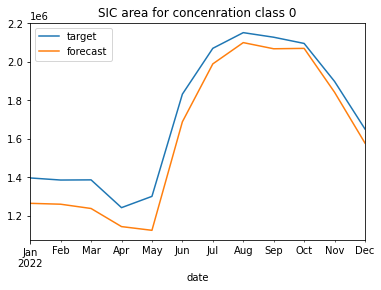

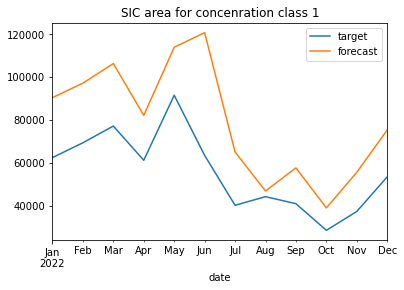

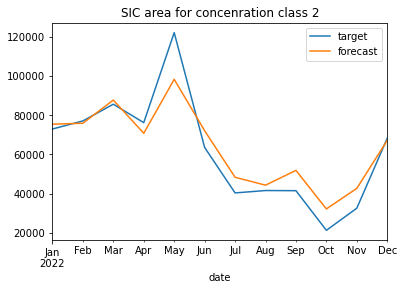

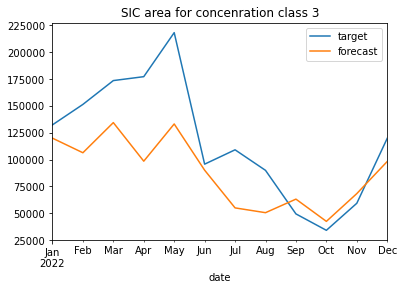

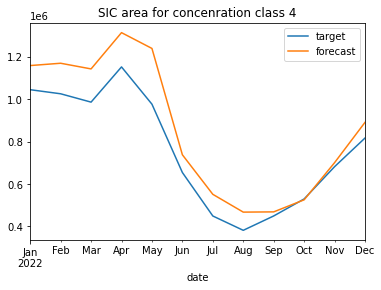

KeyError: 'target_area5'

In [8]:
plot_area(model_months)

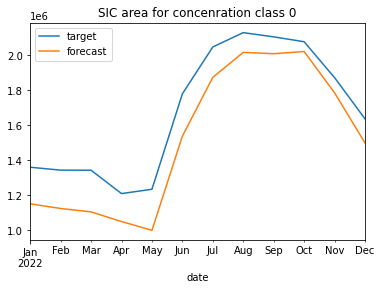

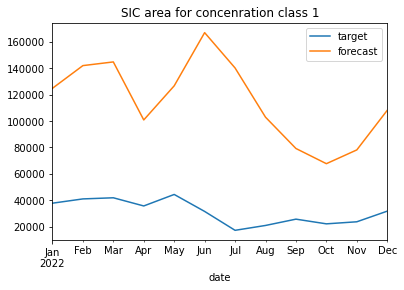

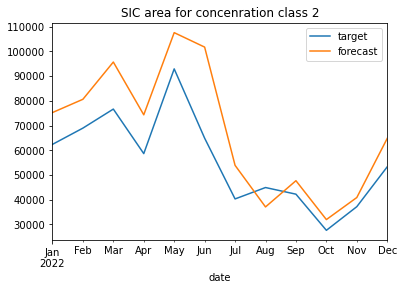

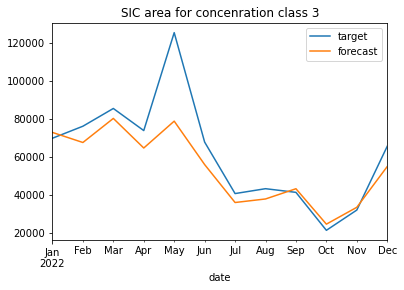

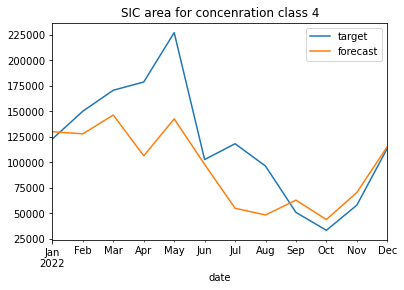

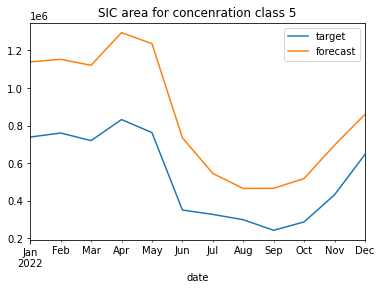

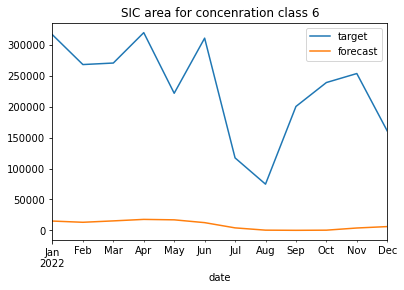

In [28]:
plot_area(model_1_months)

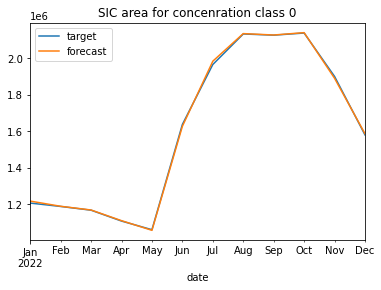

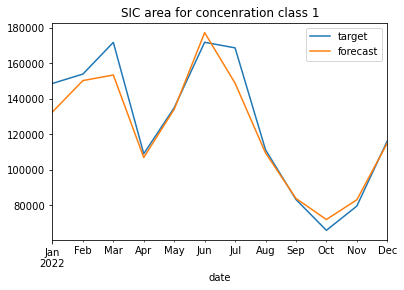

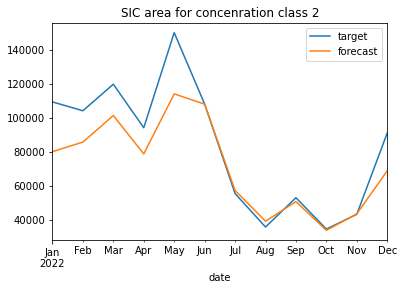

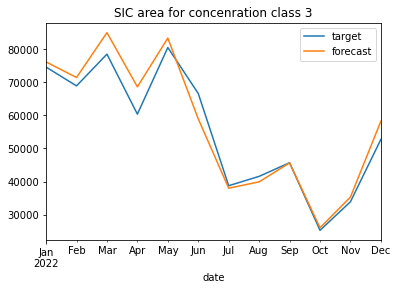

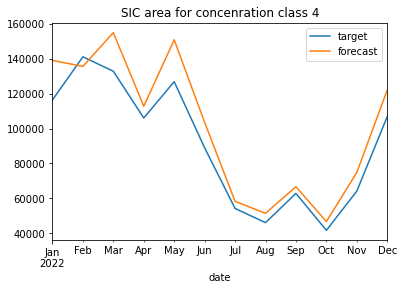

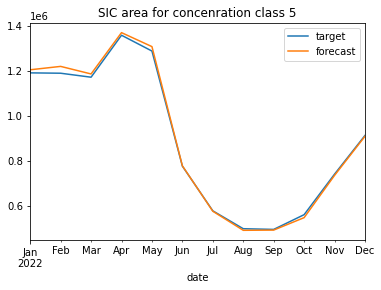

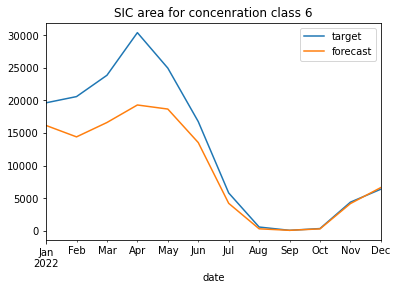

In [34]:
plot_area(model_1_ns_months)

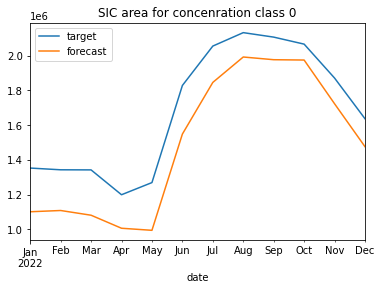

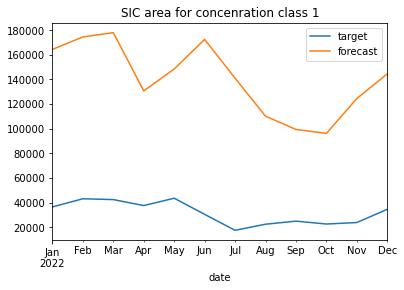

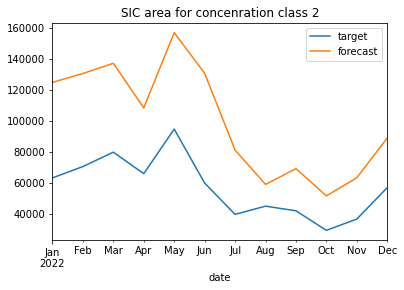

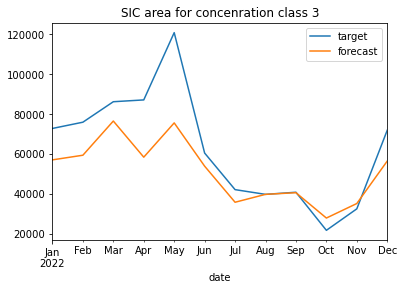

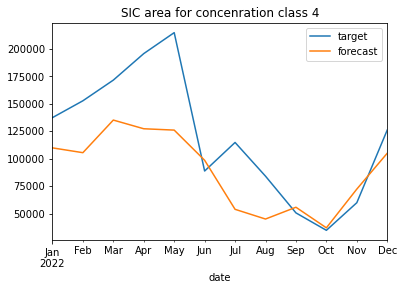

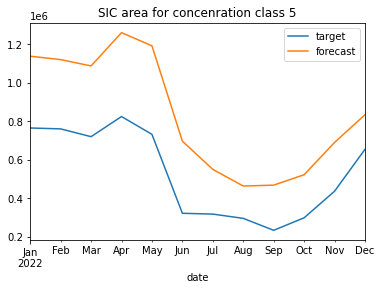

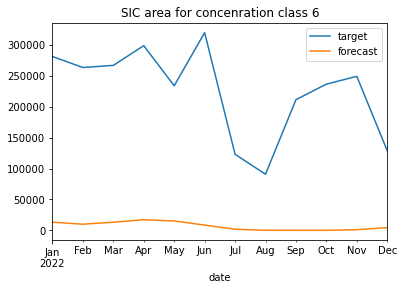

In [29]:
plot_area(model_3_months)

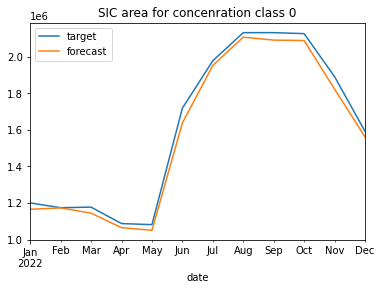

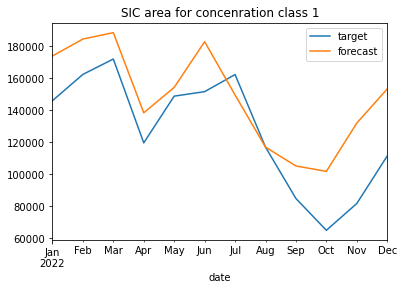

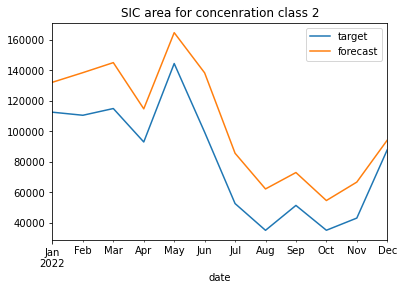

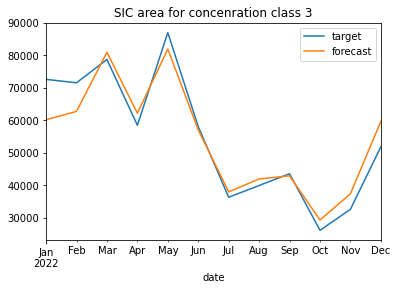

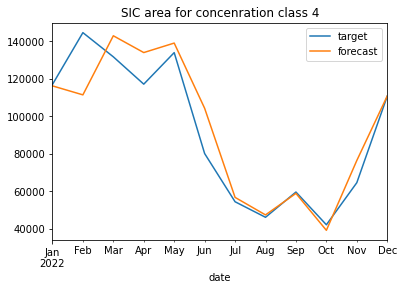

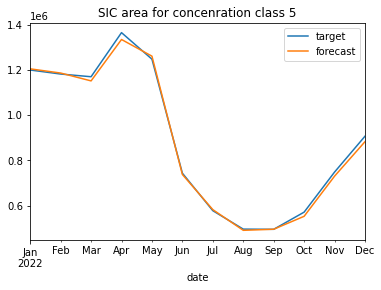

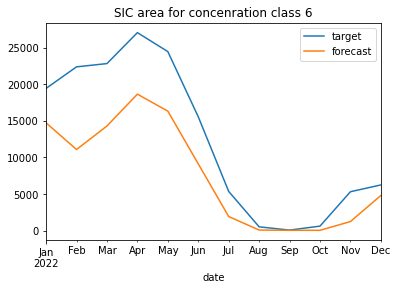

In [35]:
plot_area(model_3_ns_months)